In [163]:
import pandas as pd

In [164]:
df = pd.read_csv('adult.csv')
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [165]:
df.education.value_counts() #Sorted by frequency 

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

In [166]:
df.workclass.value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [167]:
df.occupation.value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [168]:
pd.get_dummies(df.occupation).add_prefix("occupation_")

,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
48838,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
48839,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
48840,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False


In [169]:
df = pd.concat([df.drop("occupation", axis=1), pd.get_dummies(df.occupation).add_prefix("occupation_")], axis=1)
df = pd.concat([df.drop("workclass", axis=1), pd.get_dummies(df.workclass).add_prefix("workclass_")], axis=1)
df = df.drop("education", axis=1)
df = pd.concat([df.drop("marital-status", axis=1), pd.get_dummies(df["marital-status"]).add_prefix("marital-status_")], axis=1)
df = pd.concat([df.drop("relationship", axis=1), pd.get_dummies(df.relationship).add_prefix("relationship_")], axis=1)
df = pd.concat([df.drop("race", axis=1), pd.get_dummies(df.race).add_prefix("race_")], axis=1)
df = pd.concat([df.drop("native-country", axis=1), pd.get_dummies(df["native-country"]).add_prefix("native-country_")], axis=1)

In [170]:
df

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,Male,0,0,40,<=50K,False,False,...,False,False,False,False,False,False,False,True,False,False
1,38,89814,9,Male,0,0,50,<=50K,False,False,...,False,False,False,False,False,False,False,True,False,False
2,28,336951,12,Male,0,0,40,>50K,False,False,...,False,False,False,False,False,False,False,True,False,False
3,44,160323,10,Male,7688,0,40,>50K,False,False,...,False,False,False,False,False,False,False,True,False,False
4,18,103497,10,Female,0,0,30,<=50K,True,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,Female,0,0,38,<=50K,False,False,...,False,False,False,False,False,False,False,True,False,False
48838,40,154374,9,Male,0,0,40,>50K,False,False,...,False,False,False,False,False,False,False,True,False,False
48839,58,151910,9,Female,0,0,40,<=50K,False,True,...,False,False,False,False,False,False,False,True,False,False
48840,22,201490,9,Male,0,0,20,<=50K,False,True,...,False,False,False,False,False,False,False,True,False,False


In [171]:
df["gender"] = df["gender"].apply(lambda x: 1 if x == "Male" else 0)
df["income"] = df["income"].apply(lambda x: 1 if x == ">50K" else 0)

In [172]:
df.columns.values # Columsn needed for visualisation

array(['age', 'fnlwgt', 'educational-num', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'income', 'occupation_?',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support', 'occupation_Transport-moving',
       'workclass_?', 'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay',
       'marital-status_Divorced', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent',
       'mari

<Axes: >

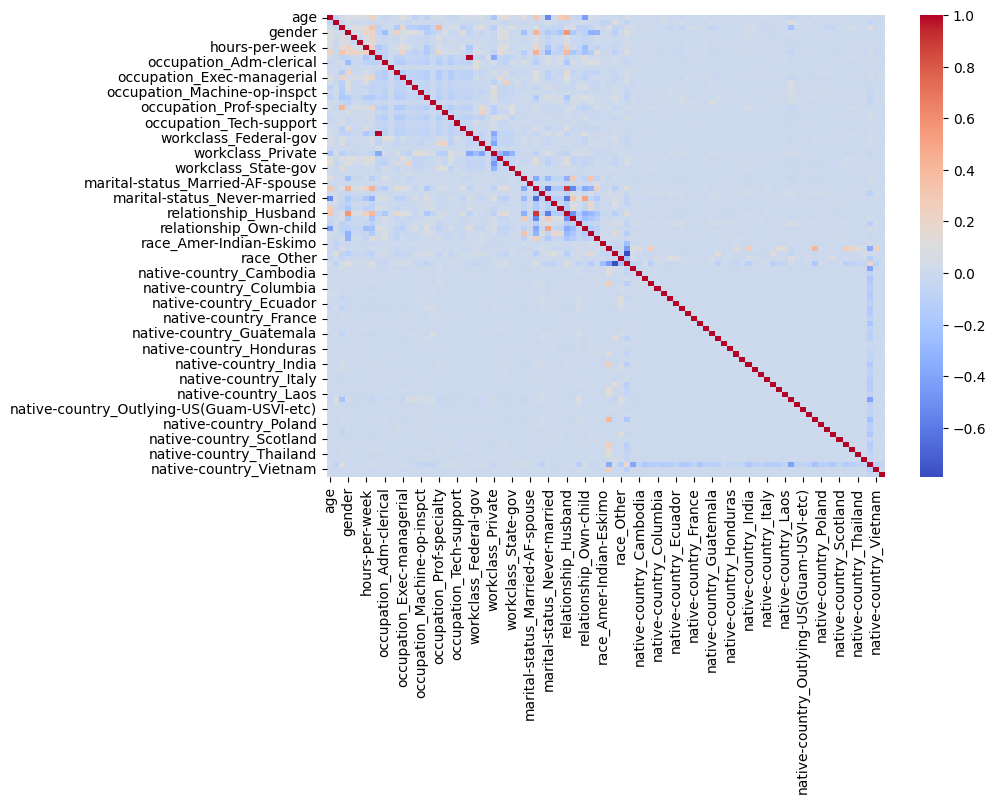

In [173]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (9, 6))
sns.heatmap(df.corr(),annot=False, cmap = "coolwarm")

This is a correlation heatmap, shows how the fetures are correlated.

In [175]:
correlations = df.corr()["income"].abs()
sorted_correlations = correlations.sort_values()
num_cols_to_drop = int(0.8 * len(df.columns))
cols_to_drop = sorted_correlations.iloc[:num_cols_to_drop].index
df_dropped = df.drop(cols_to_drop, axis=1)

1. **Correlation Calculation:** It calculates the correlation of each column in the DataFrame `df` with the column labeled "income" and takes the absolute values of these correlations. This indicates the strength of the linear relationship between each column and the "income" column.

2. **Sorting Correlations:** The code then sorts these absolute correlation values in ascending order, storing them in the `sorted_correlations` variable.

3. **Determine Columns to Drop:** It calculates the number of columns to drop (`num_cols_to_drop`) by taking 80% of the total number of columns in the DataFrame. This is presumably an attempt to remove less correlated columns, keeping only the columns with higher correlations with "income."

4. **Identifying Columns to Drop:** It selects the indices of the columns with the lowest absolute correlations with "income" based on the `num_cols_to_drop` value calculated earlier. These columns are identified and stored in the `cols_to_drop` variable.

5. **Dropping Columns:** Finally, it creates a new DataFrame (`df_dropped`) by dropping the columns identified in `cols_to_drop` from the original DataFrame `df`. This effectively removes the columns with the weakest linear relationship (as measured by correlation) with the "income" column, retaining only the columns with stronger correlations.


In [176]:
df_dropped

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_Exec-managerial,occupation_Other-service,occupation_Prof-specialty,workclass_Self-emp-inc,marital-status_Divorced,marital-status_Married-civ-spouse,marital-status_Never-married,relationship_Husband,relationship_Not-in-family,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,25,7,1,0,0,40,0,False,False,False,False,False,False,True,False,False,True,False,False
1,38,9,1,0,0,50,0,False,False,False,False,False,True,False,True,False,False,False,False
2,28,12,1,0,0,40,1,False,False,False,False,False,True,False,True,False,False,False,False
3,44,10,1,7688,0,40,1,False,False,False,False,False,True,False,True,False,False,False,False
4,18,10,0,0,0,30,0,False,False,False,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,12,0,0,0,38,0,False,False,False,False,False,True,False,False,False,False,False,True
48838,40,9,1,0,0,40,1,False,False,False,False,False,True,False,True,False,False,False,False
48839,58,9,0,0,0,40,0,False,False,False,False,False,False,False,False,False,False,True,False
48840,22,9,1,0,0,20,0,False,False,False,False,False,False,True,False,False,True,False,False


<Axes: >

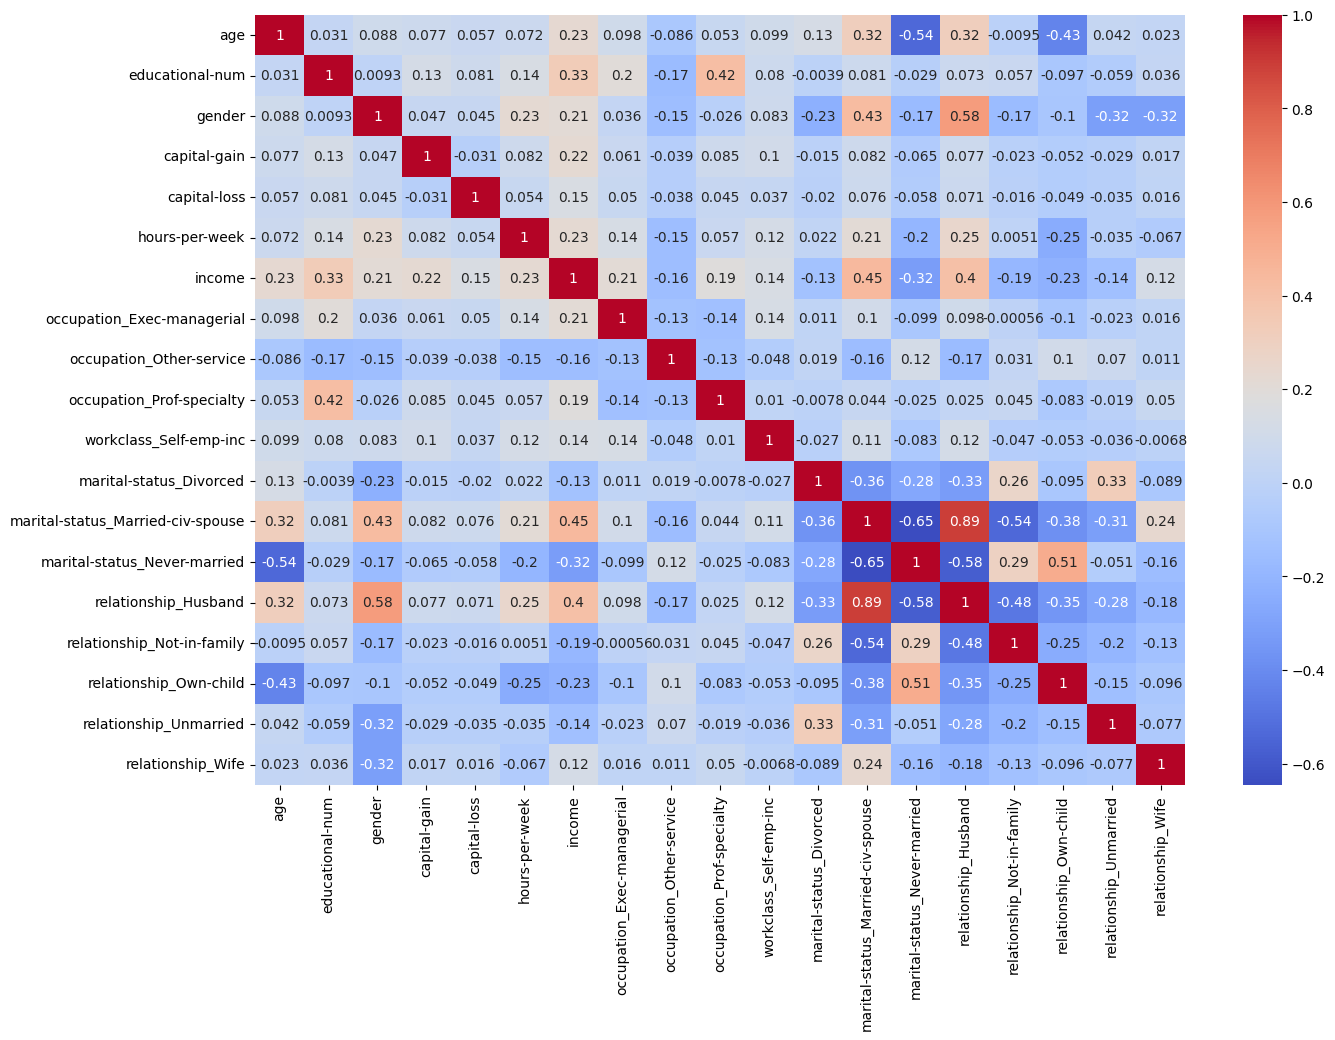

In [179]:
plt.figure(figsize = (15, 10))
sns.heatmap(df_dropped.corr(),annot=True, cmap = "coolwarm")

In [192]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
df = df.drop("fnlwgt", axis =1)
train_df, test_df  = train_test_split(df, test_size =0.2)

In [193]:
train_df

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
2727,33,10,0,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
24317,53,13,1,0,1902,40,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False
16101,34,14,1,0,0,41,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2570,27,10,1,0,0,50,0,False,False,False,...,False,False,False,True,False,False,False,False,False,False
23665,37,9,1,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46809,44,9,1,0,1485,40,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
27401,41,9,0,0,1980,40,0,False,True,False,...,False,False,False,False,False,False,False,True,False,False
20381,34,13,1,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
47115,17,6,1,0,0,30,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [194]:
test_df

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
46719,58,9,1,0,0,45,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False
48456,31,13,1,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
41606,18,10,1,0,0,30,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
26612,37,13,1,0,0,36,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False
42509,21,10,0,0,0,30,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6081,48,9,1,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
32302,22,9,0,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
15023,42,5,1,0,0,24,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
16158,46,10,1,0,1902,50,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [195]:
train_X = train_df.drop("income", axis=1)
train_Y = train_df["income"]

test_X = test_df.drop("income", axis=1)
test_Y = test_df["income"]


In [196]:
forest = RandomForestClassifier()
forest.fit(train_X, train_Y)
    

RandomForestClassifier()

In [197]:
forest.score(test_X,test_Y)

0.8519807554509161

In [198]:
forest.feature_importances_

array([2.27574627e-01, 1.32322884e-01, 1.19733951e-02, 1.10044160e-01,
       3.79654382e-02, 1.14371443e-01, 1.80472407e-03, 5.07869698e-03,
       6.25034698e-05, 6.30895847e-03, 1.96429403e-02, 4.08748089e-03,
       3.17715778e-03, 3.89369140e-03, 8.39956280e-03, 2.01766170e-04,
       1.71806651e-02, 2.69624340e-03, 6.22678563e-03, 4.32301761e-03,
       4.07021763e-03, 1.70716911e-03, 4.88524233e-03, 5.49162121e-03,
       2.68187660e-06, 9.47956674e-03, 6.26455398e-03, 7.73396427e-03,
       4.25868085e-03, 1.58754114e-04, 6.75009537e-03, 2.60943463e-04,
       7.04433610e-02, 1.06761838e-03, 2.74470891e-02, 2.00761520e-03,
       1.84706391e-03, 4.56866770e-02, 1.21637968e-02, 1.86168958e-03,
       7.83848332e-03, 5.74144484e-03, 1.04837766e-02, 1.39956733e-03,
       3.15402589e-03, 4.74720889e-03, 1.07440475e-03, 6.28773124e-03,
       2.80347769e-03, 3.63445084e-04, 1.05744160e-03, 5.85948197e-04,
       3.08541422e-04, 8.06785844e-04, 2.67041387e-04, 2.02561219e-04,
      

In [199]:
forest.feature_names_in_

array(['age', 'educational-num', 'gender', 'capital-gain', 'capital-loss',
       'hours-per-week', 'occupation_?', 'occupation_Adm-clerical',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Other-service', 'occupation_Priv-house-serv',
       'occupation_Prof-specialty', 'occupation_Protective-serv',
       'occupation_Sales', 'occupation_Tech-support',
       'occupation_Transport-moving', 'workclass_?',
       'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay',
       'marital-status_Divorced', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent',
       'marital-status_Never-mar

In [200]:
importances = dict(zip(forest.feature_names_in_, forest.feature_importances_))
importances = {k: v for k,  v in sorted(importances.items(), key = lambda x: x[1], reverse = True)}

In [201]:
importances

{'age': 0.22757462703929462,
 'educational-num': 0.13232288367750483,
 'hours-per-week': 0.11437144255271771,
 'capital-gain': 0.11004415958343167,
 'marital-status_Married-civ-spouse': 0.0704433609983296,
 'relationship_Husband': 0.045686676956023645,
 'capital-loss': 0.0379654381999753,
 'marital-status_Never-married': 0.027447089065255902,
 'occupation_Exec-managerial': 0.019642940269705693,
 'occupation_Prof-specialty': 0.017180665139782263,
 'relationship_Not-in-family': 0.012163796789984917,
 'gender': 0.011973395137742322,
 'relationship_Wife': 0.010483776638609424,
 'workclass_Private': 0.00947956674029413,
 'occupation_Other-service': 0.008399562803025097,
 'relationship_Own-child': 0.0078384833233112,
 'workclass_Self-emp-not-inc': 0.007733964267806634,
 'marital-status_Divorced': 0.0067500953749658164,
 'occupation_Craft-repair': 0.00630895846764272,
 'race_White': 0.006287731238235184,
 'workclass_Self-emp-inc': 0.006264553977999865,
 'native-country_United-States': 0.00623

`fnlwgt` is the final weight of the number of people that belong to that group.

In [209]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators":[50,100,250],
    "max_depth":[5,10,30,None],
    "min_sample_split":[2,4],
    "max_features":["sqrt","log2"]
}

grid_search = GridSearchCV(estimator =RandomForestClassifier(), 
                           param_grid =param_grid, verbose=10)

In [210]:
grid_search.fit(train_X, train_Y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5; 1/48] START max_depth=5, max_features=sqrt, min_sample_split=2, n_estimators=50


ValueError: Invalid parameter 'min_sample_split' for estimator RandomForestClassifier(max_depth=5). Valid parameters are: ['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'].